In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
set_config(display='diagram')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/Belt2_B_diabetes_v2_final.csv')
df['Glucose'] = df['Glucose'].round(decimals = 0)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,NaN,0.26,obese_1,18 - 44,F,0
4,3,106.0,72.0,NaN,NaN,0_207,overweight,18 - 44,F,0


In [ ]:
df['WeightGroup'] = df['WeightGroup'].astype('string')
df['AgeGroup'] = df['AgeGroup'].astype('string')
df['Gender'] = df['Gender'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               642 non-null    int64  
 1   Glucose                   638 non-null    float64
 2   BloodPressure             616 non-null    float64
 3   SkinThickness             455 non-null    float64
 4   Insulin                   331 non-null    float64
 5   DiabetesPedigreeFunction  642 non-null    object 
 6   WeightGroup               642 non-null    string 
 7   AgeGroup                  642 non-null    string 
 8   Gender                    642 non-null    string 
 9   Outcome                   642 non-null    int64  
dtypes: float64(4), int64(2), object(1), string(3)
memory usage: 50.3+ KB


In [ ]:
df['Pregnancies'].value_counts()
df.drop(df.index[(df.Pregnancies > 15)], inplace = True)
df['Pregnancies'].value_counts()
#removes the 1000 impossible pregnancy value

1     109
0      95
2      87
3      60
4      55
5      44
6      41
7      41
8      33
9      25
10     21
11     10
13      9
12      8
14      2
15      1
Name: Pregnancies, dtype: int64

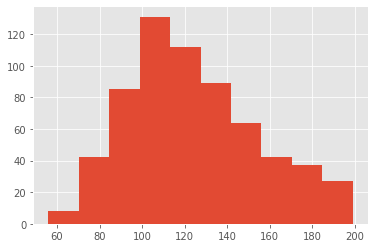

In [ ]:
df['Glucose'].value_counts()
df["Glucose"] = df["Glucose"].astype('int64', errors = "ignore")
plt.style.use('ggplot')
df['Glucose'].hist()

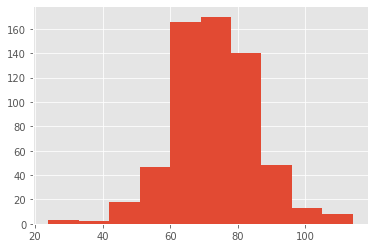

In [ ]:
df['BloodPressure'].value_counts()
df.BloodPressure = df.BloodPressure.astype('int64', errors = 'ignore')
plt.style.use('ggplot')
df['BloodPressure'].hist()

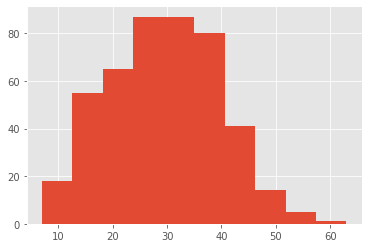

In [ ]:
df['SkinThickness'].value_counts()
df.drop(df.index[(df.SkinThickness > 80)], inplace = True)
df['SkinThickness'] = df['SkinThickness'].astype(int, errors = 'ignore')
df['SkinThickness'].describe()
plt.style.use('ggplot')
df['SkinThickness'].hist()
#I dropped the values greater than 80 because they were far removed
#from the rest of the data and skewed the data unecessarily.

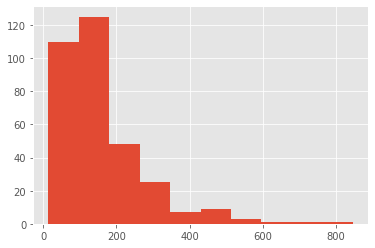

In [ ]:
df['Insulin'].value_counts()
df['Insulin'] = df['Insulin'].astype(int, errors = 'ignore')
df['Insulin'].describe()
plt.style.use('ggplot')
df['Insulin'].hist()
#I had to drop insulin values above 700 as these were not reasonable.


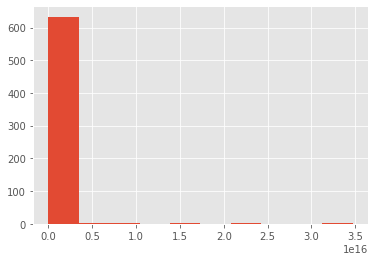

In [ ]:
df['DiabetesPedigreeFunction'].value_counts()
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(float)
df['DiabetesPedigreeFunction'].describe()
plt.style.use('ggplot')
df['DiabetesPedigreeFunction'].hist()
df.drop(df.index[(df.DiabetesPedigreeFunction > 40)], inplace = True)
df['DiabetesPedigreeFunction'].hist()
#There were some extreme values that skewed the data in this column,
#they were extremely far away from the bulk of the data relatively,
#so I had to delete these rows and used the histogram testing different
#thresholds until I removed all the impossible/unreasonable data points.





In [ ]:
df['WeightGroup'].value_counts()

obese_1           188
overweight        134
obese_2           122
obsese_3           80
healthy weight     75
MISSING             8
underweight         4
Name: WeightGroup, dtype: Int64

In [ ]:
df['AgeGroup'].value_counts()

18 - 44    503
45 - 64     97
>65          8
<65          3
Name: AgeGroup, dtype: Int64

In [ ]:
df['Gender'] = df['Gender'].replace('m', 'M')
df['Gender'].value_counts()
#Here I replaced the m with M to get consistent categorical data.

F    536
M     75
Name: Gender, dtype: Int64

In [ ]:
df['Outcome'].value_counts()

0    352
1    259
Name: Outcome, dtype: int64

In [ ]:
df.info()
df.replace({'obsese_3': 'obese_3'}, regex = True, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 1 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               611 non-null    int64  
 1   Glucose                   608 non-null    float64
 2   BloodPressure             585 non-null    float64
 3   SkinThickness             433 non-null    float64
 4   Insulin                   314 non-null    float64
 5   DiabetesPedigreeFunction  611 non-null    float64
 6   WeightGroup               611 non-null    string 
 7   AgeGroup                  611 non-null    string 
 8   Gender                    611 non-null    string 
 9   Outcome                   611 non-null    int64  
dtypes: float64(5), int64(2), string(3)
memory usage: 52.5 KB


In [ ]:
df.loc[df['AgeGroup'] == '<65', 'AgeGroup'] = '>65'
df['AgeGroup'].value_counts()

18 - 44    503
45 - 64     97
>65         11
Name: AgeGroup, dtype: Int64

In [ ]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.isna().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
DiabetesPedigreeFunction    False
WeightGroup                 False
AgeGroup                    False
Gender                      False
dtype: bool

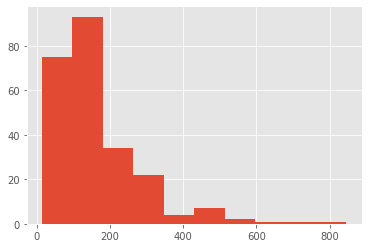

In [ ]:
plt.style.use('ggplot')
X_train['Insulin'].hist()

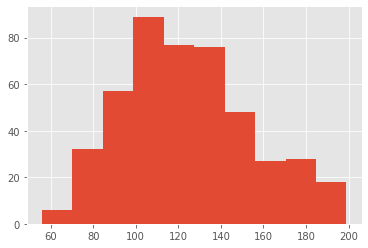

In [ ]:
plt.style.use('ggplot')
X_train['Glucose'].hist()

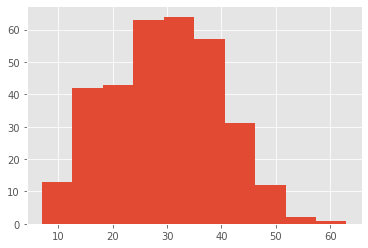

In [ ]:
plt.style.use('ggplot')
X_train['SkinThickness'].hist()

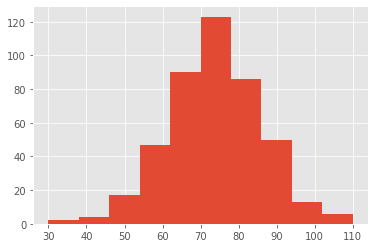

In [ ]:
plt.style.use('ggplot')
X_train['BloodPressure'].hist()

The four visualizations above show us the respective distributions of each of the columns containing missing data.  They show that Glucose, SkinThickness, and BloodPressure data from the train set are not very skewed and follow the typical bell curve look.  However, the 'Insulin' column does not follow this typical distribution as much.

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
mean_imputer = SimpleImputer(strategy='mean')
med_imputer = SimpleImputer(strategy = 'median')
med_imputer.fit(X_train[['Insulin']])
mean_imputer.fit(X_train[['SkinThickness', 'BloodPressure', 'Glucose']])
X_train.loc[:, ['Insulin']] = med_imputer.transform(X_train[['Insulin']])
X_train.loc[:, ['SkinThickness', 'BloodPressure', 'Glucose']] = mean_imputer.transform(X_train[['SkinThickness', 'BloodPressure', 'Glucose']])
X_test.loc[:, ['Insulin']] = med_imputer.transform(X_test[['Insulin']])
X_test.loc[:, ['SkinThickness', 'BloodPressure', 'Glucose']] = mean_imputer.transform(X_test[['SkinThickness', 'BloodPressure', 'Glucose']])
print(X_train.isna().any())
print(X_test.isna().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
DiabetesPedigreeFunction    False
WeightGroup                 False
AgeGroup                    False
Gender                      False
dtype: bool
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
DiabetesPedigreeFunction    False
WeightGroup                 False
AgeGroup                    False
Gender                      False
dtype: bool


I imputed missing values from the 'Isulin' column with its median value because from looking at the histogram distribution of this column, it appears to be skewed, in which case it is beneficial to look at the median as more representative of a central typical value in the data.  I imputed missing values from 'SkinThickness', 'BloodPressure', and 'Glucose' columns with their mean values because these histograms, as shown above, were not very skewed, indicating that the mean would be a better measurement of a central typical value for the dataset.

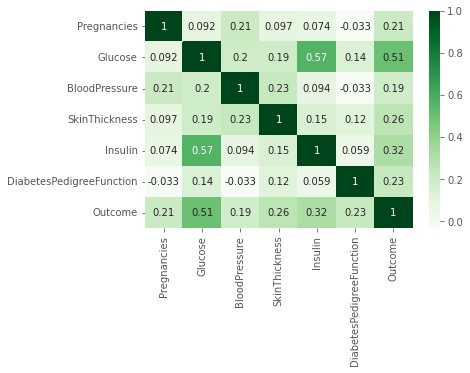

In [ ]:
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

From this correlation heatmap, we can see that the most correlated variables are Insulin and Glucose.  Of more importance, however, we can see that the most correlated variable with Outcome appears to be Glucose, with a correlation of 0.51.  The second most correlated variable with Outcome is Insulin at 0.33.

In [ ]:
# Define a dictionary for encoding our variables
weights = ["MISSING", "underweight", "healthy weight", "overweight", "obese_1", "obese_2", "obese_3"]
ages = ["18 - 44", "45 - 64", ">65"]
gender = ["M", "F"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 1 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               611 non-null    int64  
 1   Glucose                   608 non-null    float64
 2   BloodPressure             585 non-null    float64
 3   SkinThickness             433 non-null    float64
 4   Insulin                   314 non-null    float64
 5   DiabetesPedigreeFunction  611 non-null    float64
 6   WeightGroup               611 non-null    string 
 7   AgeGroup                  611 non-null    string 
 8   Gender                    611 non-null    string 
 9   Outcome                   611 non-null    int64  
dtypes: float64(5), int64(2), string(3)
memory usage: 52.5 KB


In [ ]:
categoricals = list(X_train.select_dtypes('string').columns)
numericals = list(X_train.select_dtypes(exclude=['string']).columns)
col_transformer = ColumnTransformer(transformers = [('ordinal_encoder', OrdinalEncoder(categories = [weights, ages, gender], handle_unknown = 'error'), categoricals), 
                                                    ('scaler', StandardScaler(), numericals)])
log_reg_pipe = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", LogisticRegression(random_state = 42))
])
log_reg_pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['MISSING',
                                                                              'underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obese_3'],
                                                                             ['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65'],
                                                                             ['M',
                                                                              'F']]),
                                                  ['WeightGroup', 'AgeGroup',
                                                   'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'DiabetesPedigreeFunction'])])),
                ('model', LogisticRegression(random_state=42))])

I encoded my categorial data with an ordinal encoder because the data does have a particular order.  Looking at the WeightGroup column, the data dictionary tells us that the the groups are based on the CDC's ordering of people from underweight as the lowest rank to obesity_3 at the top.  Furthermore, the AgeGroup column clearly has an ordering to it as well from youngest to oldest.

In [ ]:
log_reg_pipe.fit(X_train, y_train)
ylog1 = log_reg_pipe.predict(X_test)
labels = ['']
ConfusionMatrixDisplay.from_predictions(y_test, ylog1, display_labels=labels, cmap='Blues', normalize='true')


NameError: ignored

In [ ]:
knn_pipe = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", KNeighborsClassifier(n_neighbors = 2))
])
knn_pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['MISSING',
                                                                              'underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obese_3'],
                                                                             ['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65'],
                                                                             ['M',
                                                                              'F']]),
                                                  ['WeightGroup', 'AgeGroup',
                                                   'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'DiabetesPedigreeFunction'])])),
                ('model', KNeighborsClassifier(n_neighbors=2))])

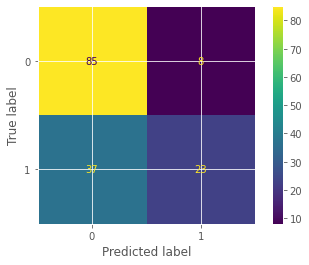

In [ ]:
knn_pipe.fit(X_train, y_train)
yknn1 = knn_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, yknn1)

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # establish a dummy log_reg_pipe function to test different c values
  log_reg_pipe_dummy = Pipeline(steps = [
                                  ("col_transformer", col_transformer),
                                  ("model", LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1'))
  ])
  log_reg_pipe_dummy.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe_dummy.score(X_train, y_train))
  test_scores.append(log_reg_pipe_dummy.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

ValueError: ignored

In [ ]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  knn_dummy = Pipeline(steps = [
                                  ("col_transformer", col_transformer),
                                  ("model", LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1'))
  ])
  log_reg_pipe_dummy.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test_processed))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

ValueError: ignored

In [ ]:
log_reg_pipe_best = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", LogisticRegression(C=10, max_iter=1000, solver='liblinear', penalty='l1'))
])
log_reg_pipe_best.fit(X_train, y_train)
ylog2 = log_reg_pipe_best.predict(X_train)

ValueError: ignored